5.781292676925659


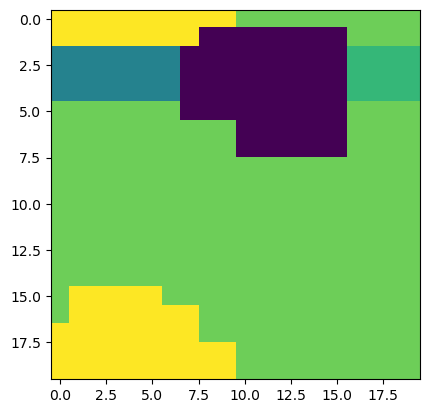

In [3]:
import potts_cy


potts_cy.run()


Monte Carlo Simulation of Potts model

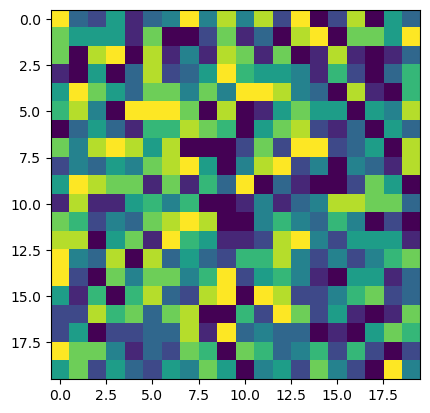

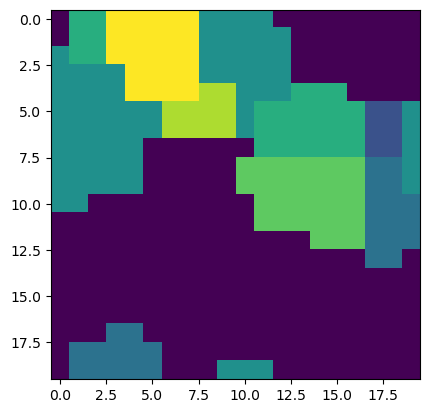

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cython

q = 10
N : cython.int = 20

T = 0.5

n_runs : cython.int = 100000

def Energy(lattice, i : cython.int, j : cython.int):
    return -np.count_nonzero(lattice[i,j] == [lattice[(i + 1)%N, j], lattice[(i - 1)%N, j], lattice[i, (j + 1)%N], lattice[i, (j - 1)%N]])

def Total_Energy(lattice):
    E = (lattice == np.roll(lattice, 1, axis=0)).sum() + (lattice == np.roll(lattice, 1, axis=1)).sum()
    return E

def flip(lattice, i, j):
    lattice[i, j] = np.random.randint(0, q)

def flip_maybe(lattice, i, j):
    before = lattice[i, j]
    E = Energy(lattice, i, j)
    flip(lattice, i, j)
    if not np.random.rand() < np.exp(-2*(Energy(lattice, i, j)- E)/T):
        lattice[i, j] = before

def run(lattice, n_runs : cython.int, N : cython.int):
    k : cython.int

    for k in range(n_runs):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)

        flip_maybe(lattice, i, j)

        # if k % (n_runs//10) == 0:
        #     print(k, Total_Energy(lattice)/(N*N))


lattice = np.random.randint(0, q, (N, N), dtype=np.int32)

plt.imshow(lattice)
plt.show()

run(lattice, n_runs, N)
plt.imshow(lattice)
plt.show()

In [7]:
trus = np.array([True for i in range(10000)])


In [36]:
test = np.array([[0,2,1],
                 [3,0,2],
                 [1,2,1]])

(test == 2)

array([[False,  True, False],
       [False, False,  True],
       [False,  True, False]])

In [10]:
%%timeit

for i in range(10000):
    trus.sum()


184 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit

for i in range(10000):
    np.count_nonzero(trus)

29.8 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
